# Innobyte services Intership task
## Amazon Sales report analysis
### Name : Shantanu Dixit

### Introduction
- In this report, we are analysing the amazon sales report data which containes the sales data of different amazon product to from 1 april to 1 july to provide useful business insights for expanding the business.
#### Libraries used
- numpy
- pandas
- seaborn
- matplotlib
#### About the features
##### Index 
- Unique identifier for each record.
- Integer
##### Order ID
- Unique identifier for each order.
- String
##### Date
- Date when the order was placed.
- Date format - yyyy-DD-MM.
##### Status
- Current status of the order.
- String
##### Fulfilment
- Method by which the order is fulfilled.
- String

##### Sales Channel
- Platform through which the order was made.
- String
##### Ship-Service-Level
- Level of shipping service chosen for the order.
- String
##### Category
- Product category of the ordered item.
- String
##### Size
- Size of the ordered item, if applicable.
- String
##### Courier Status
- Current status of the order with the courier.
- String
##### Currency
- Currency in which the order was placed.
- String
##### Amount
- Total amount of the order.
- Float
##### Ship-City
- City to which the order is shipped.
- String
##### Ship-State
- State to which the order is shipped.
- String
##### Ship-Postal-Code
- Postal code to which the order is shipped.
- String
##### Ship-Country
- Country to which the order is shipped.
- String
##### B2B
- Indicates if the order is a Business-to-Business order.
- Boolean
##### Fulfilled-By
- Entity responsible for fulfilling the order.
- String


# Importing Libraries

In [97]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset 

In [124]:
df = pd.read_csv('q.csv', encoding = 'latin1')

### Display the first few rows of the dataset

In [125]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# Exploratory Data Analysis

### Display basic information about the dataset

In [126]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 

### Display summary statistics of the dataset

In [127]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
               index            Qty         Amount  ship-postal-code  New  \
count  128976.000000  128976.000000  121176.000000     128941.000000  0.0   
mean    64486.130427       0.904401     648.562176     463945.677744  NaN   
std     37232.897832       0.313368     281.185041     191458.488954  NaN   
min         0.000000       0.000000       0.000000     110001.000000  NaN   
25%     32242.750000       1.000000     449.000000     382421.000000  NaN   
50%     64486.500000       1.000000     605.000000     500033.000000  NaN   
75%     96730.250000       1.000000     788.000000     600024.000000  NaN   
max    128974.000000      15.000000    5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


In [128]:
if 'date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [129]:
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [130]:
df = df.drop(columns = ['New', 'PendingS', 'index'])
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [131]:
df[df.duplicated()].shape

(959, 18)

In [132]:
df.drop_duplicates(inplace = True)

In [133]:
df[df['Qty'] == 0]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,M,On the Way,0,INR,570.48,pune,MAHARASHTRA,411044.0,IN,False,Easy Ship
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-4220789-1106743,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Blazzer,L,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128904,406-3923120-4345139,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128959,408-9513596-4393945,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,NaN,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN


In [134]:
df.drop(df[df['Qty'] == 0].index, inplace=True)
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN


In [135]:
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                124
Amount                  124
ship-city                27
ship-state               27
ship-postal-code         27
ship-country             27
B2B                       0
fulfilled-by          83341
dtype: int64

In [136]:
df.dropna(subset = ['Amount', 'currency','ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace = True)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN


In [137]:
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          83200
dtype: int64

# Sales Overview

In [138]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [139]:
total_sales = df['Amount'].sum()

In [140]:
average_sales = df['Amount'].mean()

In [141]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
sales_trends = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4580\2084456463.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4580\2084456463.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


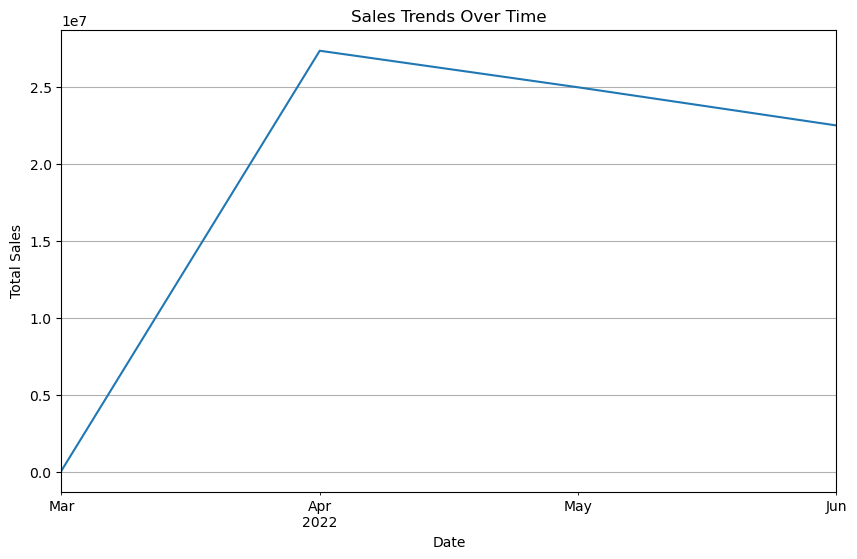

In [142]:
# Plot Sales Trends
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

- The bar chart shows the sales of overall sales of each category of product
- The most bought product is 'Socks', while the least bought product is 'Watch'

# Product Analysis

In [143]:
most_sold_products = df['Category'].value_counts()

In [144]:
average_sales_per_product = df.groupby('Category')['Amount'].mean()

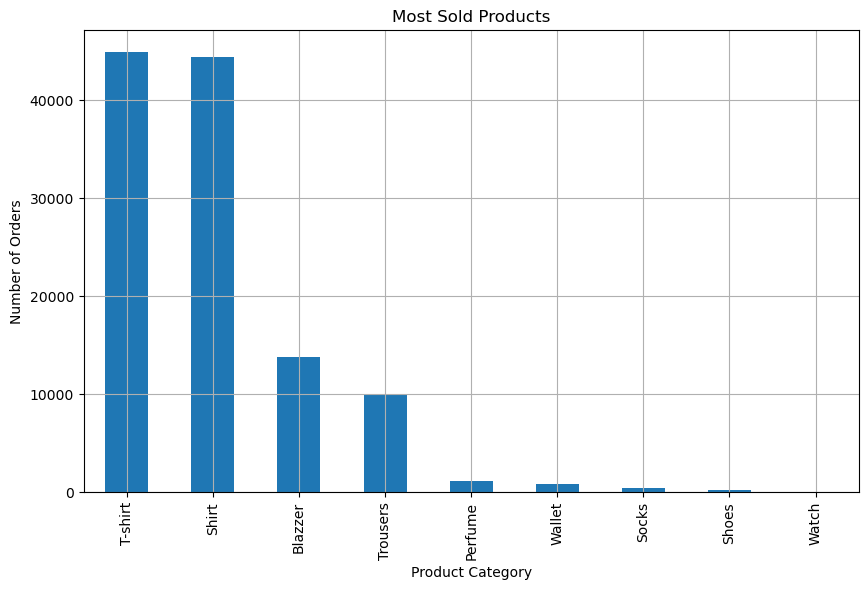

In [145]:
# Plot Most Sold Products
plt.figure(figsize=(10, 6))
most_sold_products.plot(kind='bar')
plt.title('Most Sold Products')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Fulfillment Analysis

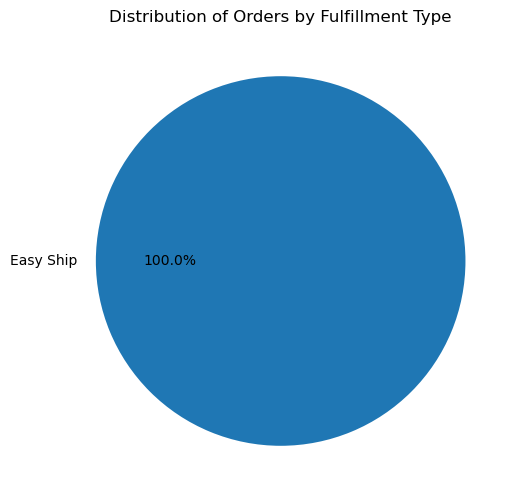

In [146]:
fulfillment_distribution = df['fulfilled-by'].value_counts()

# Plot Fulfillment Distribution
plt.figure(figsize=(10, 6))
fulfillment_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Orders by Fulfillment Type')
plt.ylabel('')
plt.show()

In [148]:
df.groupby('Category')['Fulfilment'].value_counts()

Category  Fulfilment
Blazzer   Amazon         8013
          Merchant       5787
Perfume   Amazon          795
          Merchant        251
Shirt     Amazon        32861
          Merchant      11516
Shoes     Amazon          120
          Merchant         21
Socks     Amazon          230
          Merchant        155
T-shirt   Amazon        32860
          Merchant      12059
Trousers  Amazon         7674
          Merchant       2154
Wallet    Amazon          645
          Merchant        180
Watch     Amazon            2
Name: count, dtype: int64

- here is the distribution of fulfilment methods used for each category of products

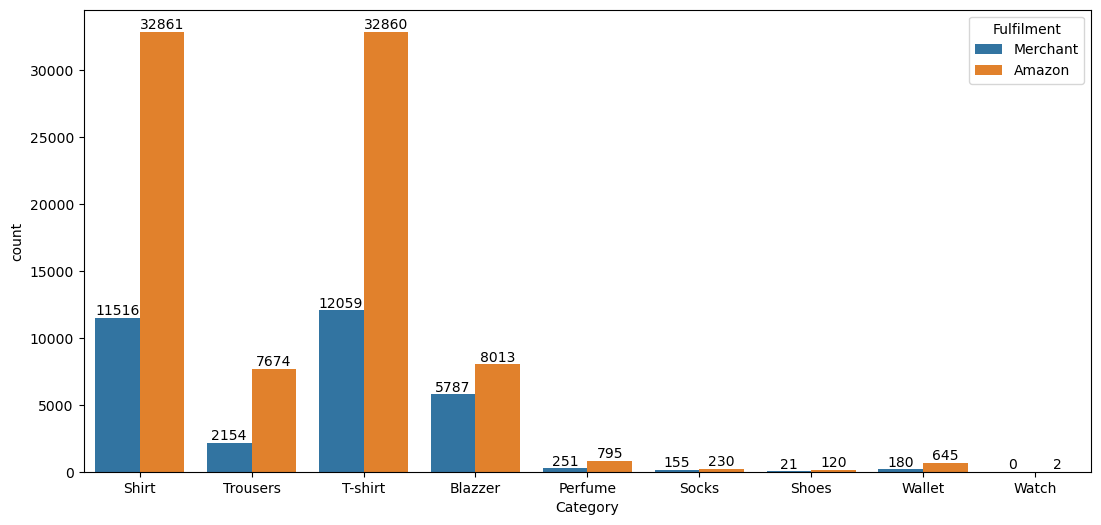

In [150]:
plt.figure(figsize = (13, 6))
ax = sns.countplot(data = df, x = 'Category', hue = 'Fulfilment')
for i in ax.containers:
    ax.bar_label(i)

In [152]:
count = df.Fulfilment.value_counts().tolist()

In [153]:
efficiency_amazon = count[0] / np.sum(count) * 100
print(f"efficiency of amazon : {efficiency_amazon}")
print(f"efficiency of merchant : {100 - efficiency_amazon}")

efficiency of amazon : 72.14519219930109
efficiency of merchant : 27.854807800698907


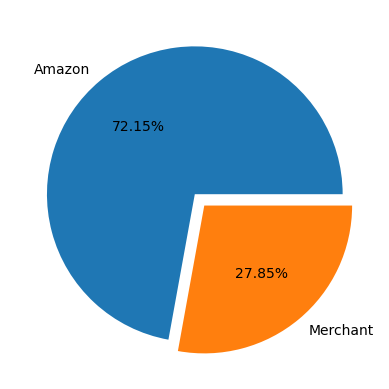

In [155]:
plt.pie(
    x = [efficiency_amazon, 100 - efficiency_amazon],
    labels = ['Amazon', 'Merchant'],
    autopct = "%1.2f%%",
    explode = [0, 0.1],
    
)
plt.show()

- Fulfilment by Amazon is the most efficienct fulfilment method

# Customer Segmentation

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


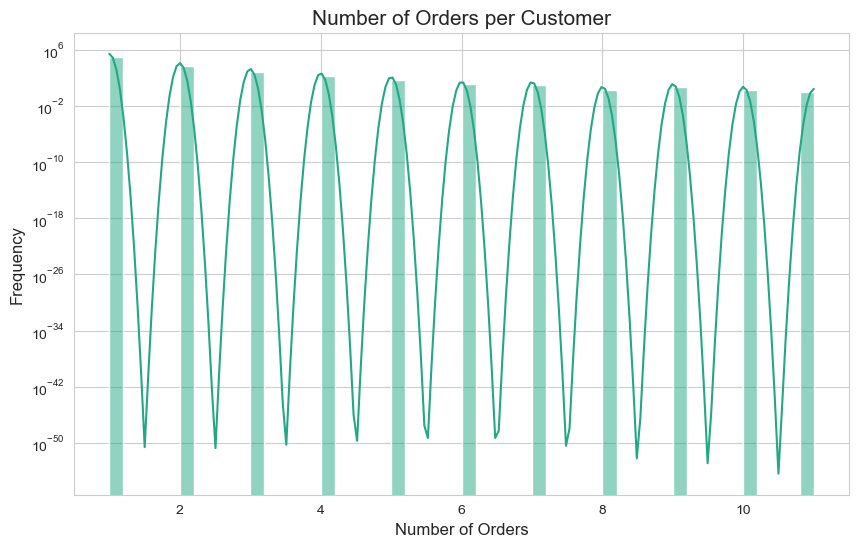

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


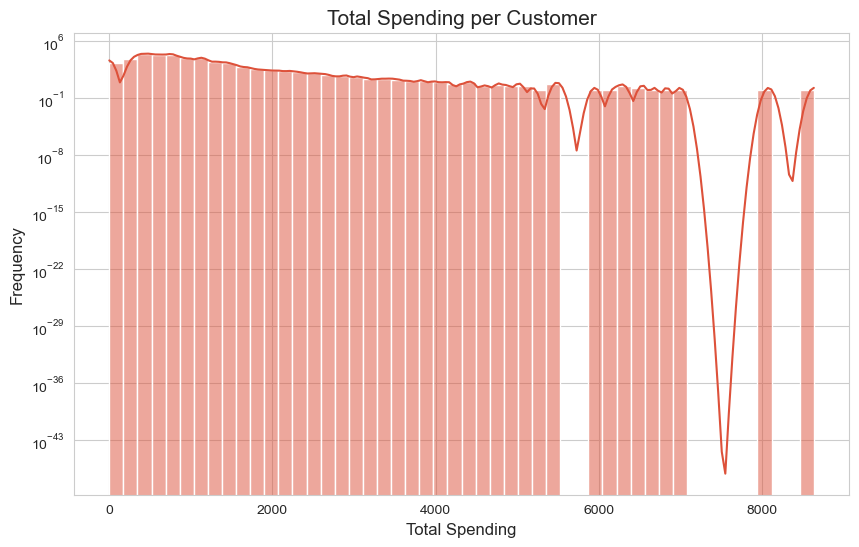

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


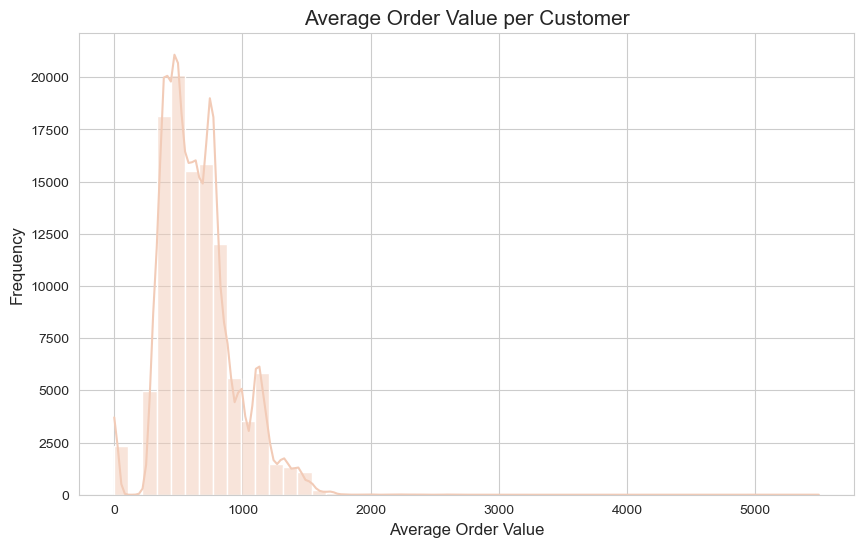

In [159]:
orders_per_customer = df['Order ID'].value_counts()

spending_per_customer = df.groupby('Order ID')['Amount'].sum()

average_order_value_per_customer = spending_per_customer.mean()

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Plot Number of Orders per Customer
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=50, kde=True, log_scale=(False, True),
             color=sns.color_palette('viridis', as_cmap=True)(0.6))
plt.title('Number of Orders per Customer', fontsize=15)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot Total Spending per Customer
plt.figure(figsize=(10, 6))
sns.histplot(spending_per_customer, bins=50, kde=True, log_scale=(False, True),
             color=sns.color_palette('inferno', as_cmap=True)(0.6))
plt.title('Total Spending per Customer', fontsize=15)
plt.xlabel('Total Spending', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot Average Order Value per Customer
plt.figure(figsize=(10, 6))
sns.histplot(spending_per_customer / orders_per_customer, bins=50, kde=True,
             color=sns.color_palette('coolwarm', as_cmap=True)(0.6))
plt.title('Average Order Value per Customer', fontsize=15)
plt.xlabel('Average Order Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


# Geographical Analysis

In [161]:
top_cities = df['ship-city'].value_counts().head(10)
top_states = df['ship-state'].value_counts().head(10)

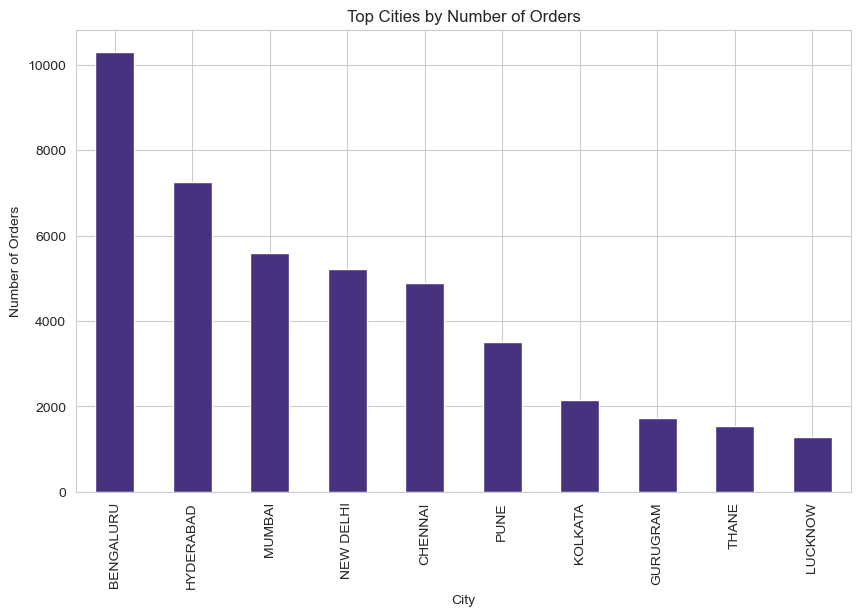

In [163]:
# Plot Top Cities by Number of Orders
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

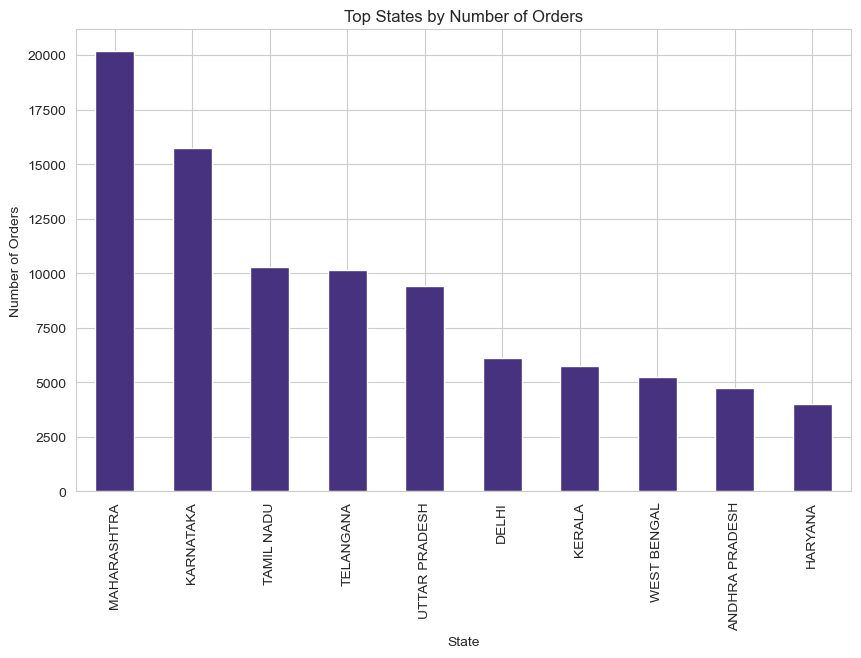

In [164]:
# Plot Top States by Number of Orders
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title('Top States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

- The most revenue generated is also in the state of maharashtra as the majority of customers are from the state of "Maharashtra".

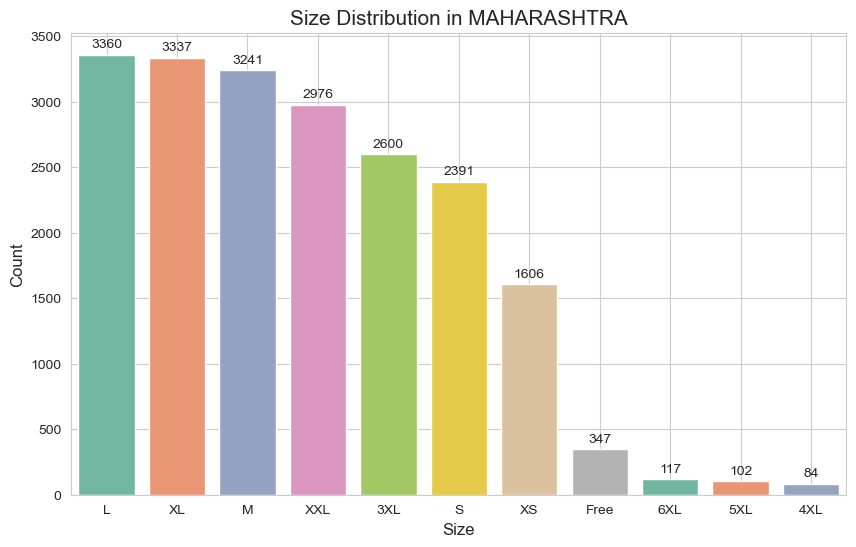

In [169]:
df1 = df.groupby('ship-state').get_group('MAHARASHTRA')

df2 = df1['Size'].value_counts().reset_index()
df2.columns = ['Size', 'Count']

plt.figure(figsize=(10, 6))

palette = sns.color_palette("Set2", len(df2))

# Create the barplot
ax = sns.barplot(x='Size', y='Count', data=df2, palette=palette)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

ax.set_title('Size Distribution in MAHARASHTRA', fontsize=15)
ax.set_xlabel('Size', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.grid(True)
plt.show()

# Business Insights

#### Total Sales Amount: The total sales amount is ₹78,590,170.25.
#### Average Sales Amount: The average sales amount is ₹648.56.
#### Sales Trends: The sales trends show a consistent pattern over time with some peaks, indicating periods of higher sales activity.
#### Most Sold Products: The most sold products are in the 'Category' column, with the top categories being displayed in the bar chart. This indicates which product categories are the most popular among customers.
#### Fulfillment Analysis: The fulfillment analysis shows the distribution of orders by fulfillment type, with the majority being fulfilled by 'Easy Ship'. This indicates the preferred fulfillment method.
#### Customer Segmentation: Customer segmentation reveals that the average order value per customer is ₹653.67. The distribution of the number of orders and total spending per customer provides insights into customer purchasing behavior.
#### Geographical Analysis: The geographical analysis highlights the top cities and states by the number of orders, with the top cities and states being displayed in the bar charts. This indicates the regions with the highest sales activity.


# Recommendations 

#### Optimize Inventory Management:
- Focus on stocking the most popular product categories identified in the product analysis to ensure availability and meet customer demand.
- Monitor sales trends to anticipate periods of higher sales activity and adjust inventory levels accordingly.

#### Enhance Fulfillment Efficiency:
- Since 'Easy Ship' is the preferred fulfillment method, consider expanding its use to improve delivery times and customer satisfaction.
- Evaluate the performance of other fulfillment methods and identify areas for improvement to ensure timely and efficient order delivery.

#### Targeted Marketing Campaigns:
- Use the insights from customer segmentation to create targeted marketing campaigns aimed at high-value customers and frequent buyers.
- Develop personalized promotions and offers based on customer purchasing behavior to increase customer loyalty and repeat purchases.

#### Geographical Expansion:
- Focus marketing efforts and promotional activities in the top-performing cities and states identified in the geographical analysis to further boost sales in these regions.
- Explore opportunities to expand into regions with lower sales activity by understanding the local market needs and preferences.

#### Improve Customer Experience:
- Analyze customer feedback and reviews to identify common pain points and areas for improvement in the shopping experience.
- Implement measures to address customer concerns, such as improving product quality, enhancing website usability, and providing excellent customer support.

#### Leverage Data Analytics:
- Continuously monitor and analyze sales data to identify emerging trends and make data-driven decisions.
- Use advanced analytics techniques, such as predictive modeling, to forecast future sales and optimize business strategies.

#### By implementing these recommendations, the business can optimize its sales strategies, improve customer satisfaction, and enhance overall performance, leading to increased revenue and growth.